### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.


#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](../assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.

#### Paso 3.a) Crear la Función de Transferencia.


In [1]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.


Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


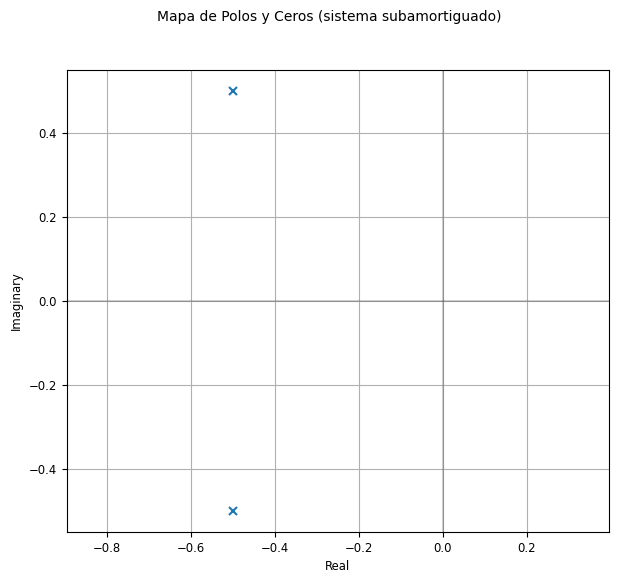

In [2]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()

#### Paso 3.c) Graficar la respuesta del sistema.


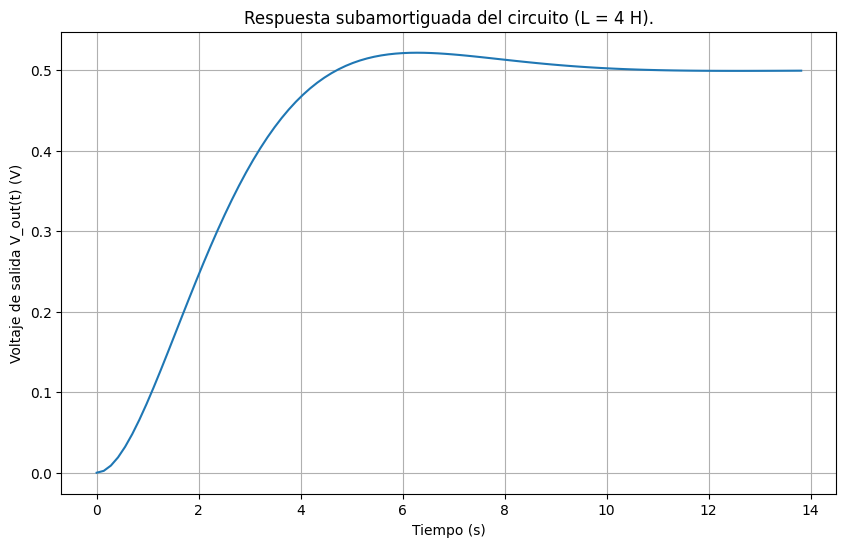

In [3]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

#### Cálculos para el sistema Críticamente Amortiguado.

Para nuestro análisis, utilizaremos la fórmula general para resolver la ecuación de segundo grado.
![Cálculo Críticamente Amortiguado.](../assets/images/amortiguado.jpg)

*Figura 2. Cálculo para el sistema Críticamente Amortiguado.*

In [4]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 12-8*np.sqrt(2)      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_critamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_critamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  1.373 s^2 + 4.686 s + 4


Las raíces de s (polos) son:
[-1.70710683+0.j -1.70710673+0.j]


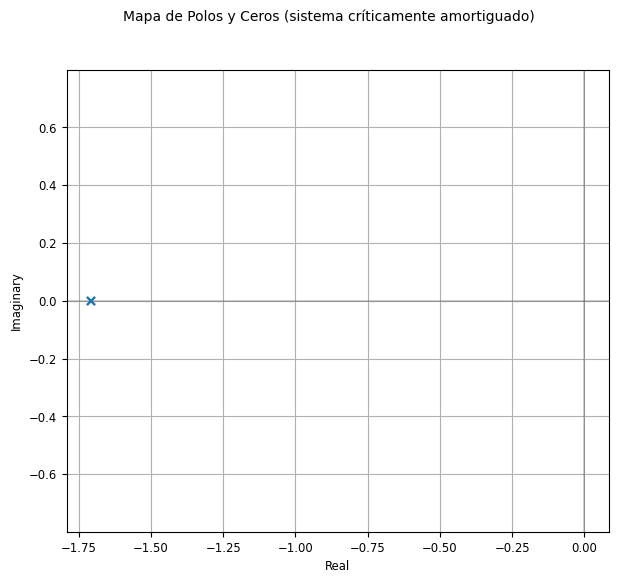

In [5]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_critamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_critamortiguado, title='Mapa de Polos y Ceros (sistema críticamente amortiguado)')
plt.grid(True)
plt.show()

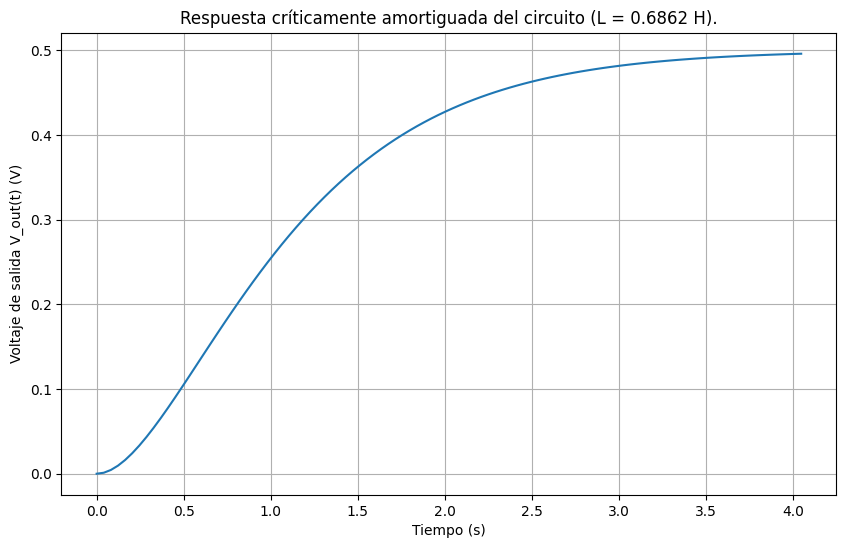

In [6]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_critamortiguado = ct.step_response(sistema_critamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_critamortiguado)
plt.title('Respuesta críticamente amortiguada del circuito (L = 0.6862 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

#### Análisis de la respuesta sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado y críticamente amortiguado, podemos proponer un valor de L para éste sistema y encontrar los valores de los polos de la función sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Sobremortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, y proponiendo $L = 0.4 \,H$, determina analíticamente el valor de los polos para el sistema sobreamortiguado.
    $$ \implies \Delta = s^2 (0.8) + s(4.4) + (4) = 0 $$

    Esto resultará en dos polos negativos, reales y diferentes.

    Resolviendo el sistema con la fórmula general nos queda de la siguiente forma:
    $$x = \frac{-4.4 \pm \sqrt{4.4^{2}- 4*0.8*4}} {2*0.8}$$

    Al realizar las operaciones el primer polo nos queda como:
    $$x1 = \frac{-4.4 + \sqrt{4.4^{2}- 4*0.8*4}} {1.6}$$

    $$x2 = \frac{-4.4 - \sqrt{4.4^{2}- 4*0.8*4}} {1.6}$$

    Siendo:

    $$x1 = -\frac{11 + \sqrt{41}} {4} $$

    $$x2 = \frac{-11 + \sqrt{41}} {4} $$




    




In [7]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 0.4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_sobreamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_sobreamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           2
  -------------------
  0.8 s^2 + 4.4 s + 4


Las raíces de s (polos) son:
[-4.35078106+0.j -1.14921894+0.j]


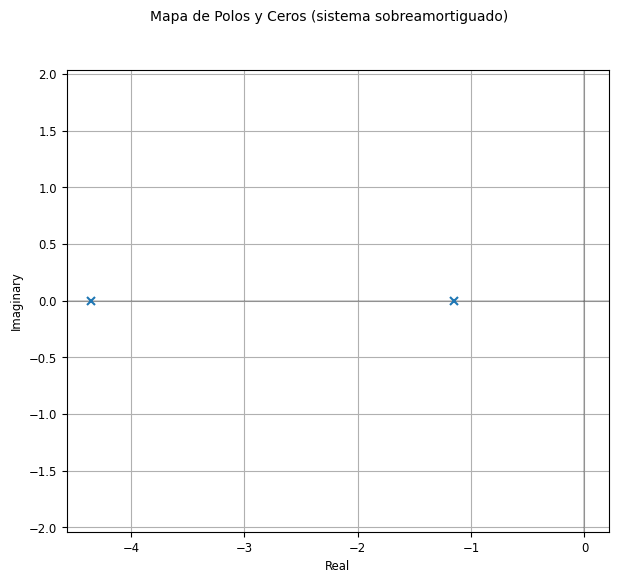

In [8]:
polos = ct.poles(sistema_sobreamortiguado)

print("Las raíces de s (polos) son:")
print(polos)

plt.figure(figsize=(7, 6))
ct.pzmap(sistema_sobreamortiguado, title='Mapa de Polos y Ceros (sistema sobreamortiguado)')
plt.grid(True)
plt.show()

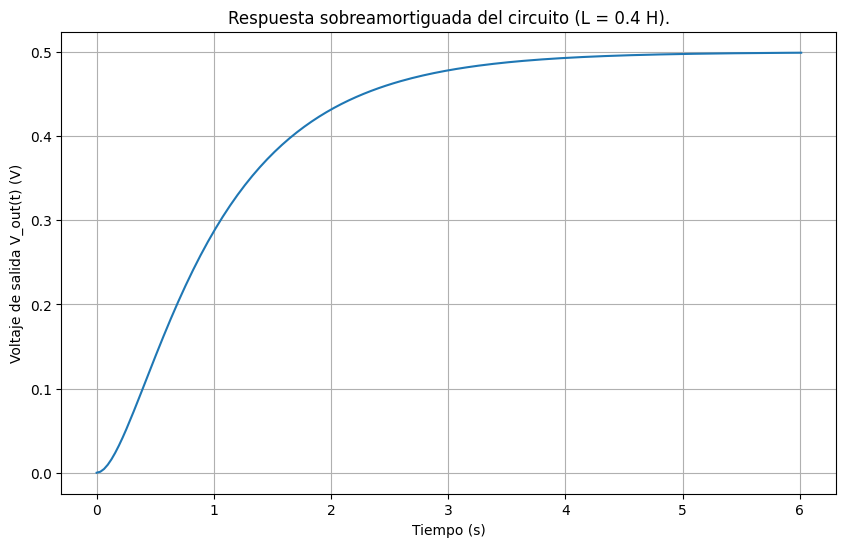

In [9]:
t, vout_sobreamortiguado = ct.step_response(sistema_sobreamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_sobreamortiguado)
plt.title('Respuesta sobreamortiguada del circuito (L = 0.4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

<function matplotlib.pyplot.show(close=None, block=None)>

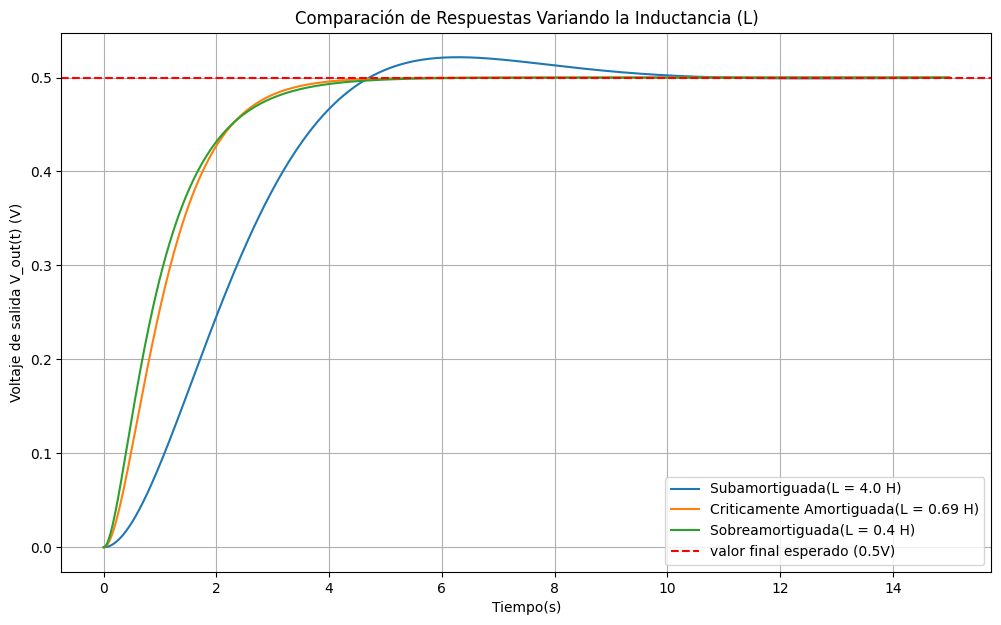

In [10]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

#Parámetros fijos
R1 = 2 #Ohms
R2 = 2 #Ohms
C = 1  #Faradios

#Valores de cada sistema
L_sub = 4.0
L_crit = 12 - 8 * np.sqrt(2)
L_sobre = 0.4

#Modelado de los sistemas

#Numerador de todos
num = [R2]

#Sistema Subamortiguado
den_sub = [L_sub *C * R1, L_sub + R1 * R2 * C, R1 + R2]
sistema_sub = ct.tf(num, den_sub)

#Sistema Críticamente amortiguado
den_crit = [L_crit *C * R1, L_crit + R1 * R2 * C, R1 + R2]
sistema_crit = ct.tf(num, den_crit)

#Sistema Sobre Amortiguado
den_sobre = [L_sobre *C * R1, L_sobre + R1 * R2 * C, R1 + R2]
sistema_sobre = ct.tf(num, den_sobre)

#Simulación de las respuestas
t = np.linspace(0,15,1000) #Vector de tiempo para las 3 respuestas
_, vout_sub = ct.step_response(sistema_sub, T=t)
_, vout_crit = ct.step_response(sistema_crit, T=t)
_, vout_sobre = ct.step_response(sistema_sobre, T=t)

#Graficación comparativa
plt.figure(figsize=(12,7))
plt.plot(t,vout_sub, label=f'Subamortiguada(L = {L_sub} H)')
plt.plot(t,vout_crit, label=f'Criticamente Amortiguada(L = {L_crit:.2f} H)')
plt.plot(t,vout_sobre, label=f'Sobreamortiguada(L = {L_sobre} H)')

plt.title('Comparación de Respuestas Variando la Inductancia (L)')
plt.xlabel('Tiempo(s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.axhline(y=0.5, color='r', linestyle='--', label='valor final esperado (0.5V)')
plt.legend()
plt.grid(True)
plt.show



